In [1]:
fdir = "../hanglog/swinging"

import os
logfiles = os.listdir(fdir)
print(logfiles)
fLog = os.path.join(fdir, logfiles[0])

['hdata-2021-01-01_18-50-08.log']


In [2]:
import sys
sys.path.append("..")
import hacktrack.loaders
fd = hacktrack.loaders.FlyDat(fLog)

Extracting knowndate from filename: 2021-01-01
E:1, Y:18080, Z:18059, aZ:603, aA:8334, aF:580
linAdifftime 7365.45426594927 count 1301
Made for Q 0 last index 0
Made for V 0 last index 0
Loading aQV as no pQV records
Made for aQ 0 last index 0
Made for aV 0 last index 0
Missing GPS data, so setting t0 to 2021-01-01 18:44:11.204454


In [4]:
fd.LoadC("ZYE")

Made for Z 18059 last index 18059
Warning, using guessed (not GPS) timing corrected value on Z 18059
pCattrname pZ
Made for Y 18080 last index 18080
Warning, using guessed (not GPS) timing corrected value on Y 18080
pCattrname pY
BAD VALUES 1 [(0, 'End(36139,9518)\n')]
Made for E 1 last index 0
Warning, using guessed (not GPS) timing corrected value on E 1


2

In [6]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook

import scipy.signal as sig
pitch=fd.pE[fd.pE.m==1]
roll=fd.pE[fd.pE.m==2]
#filt = sig.savgol_filter(a.d, 19,2)
#plt.plot(filt)
pitch

,m,d


In [5]:
import numpy as np

def set_zero(p):
    p.loc[:,'pitch'] = p['pitch']-p['pitch'].iloc[0]
    p.loc[:,'roll'] = p['roll']-p['roll'].iloc[0]
    p.loc[:,'heading'] = p['heading']-p['heading'].iloc[0]
    return p

def calc_a(p,g):
    set_zero(p)
    p.loc[:,'ax_calc']= -g * np.sin(np.radians(p['roll']))
    p.loc[:,'ay_calc']= -g * np.sin(np.radians(p['pitch']))
    return p

<IPython.core.display.Javascript object>


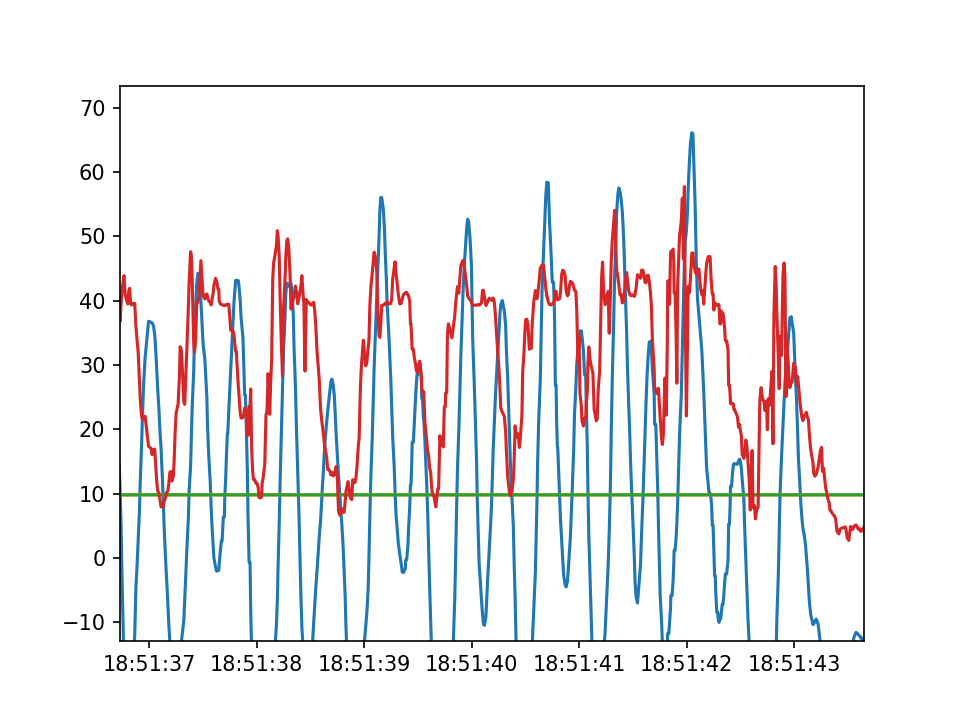

In [7]:
pilot = fd.pZ[~fd.pZ.bad]
wing = fd.pY[~fd.pY.bad]

plt.plot(wing.pitch)

In [9]:
g_wing = (wing.gx**2+wing.gy**2+wing.gz**2)**0.5
g_pilot = (pilot.gx**2+pilot.gy**2+pilot.gz**2)**0.5
plt.plot(g_wing)

In [10]:
wing['gx_app'] = wing['ax']+wing['gx']
wing['gy_app'] = wing['ay']+wing['gy']
wing['gz_app'] = wing['az']+wing['gz']
g_app_wing = (wing.gx_app**2+wing.gy_app**2+wing.gz_app**2)**0.5


/home/timbo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/timbo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/timbo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [11]:
plt.plot(g_app_wing)

In [62]:
ptest = calc_a(pZ, 9.81)


/home/timbo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/timbo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [63]:
ax_err = ptest['ax'] - ptest['ax_calc']
ay_err = ptest['ay'] - ptest['ay_calc']

<IPython.core.display.Javascript object>


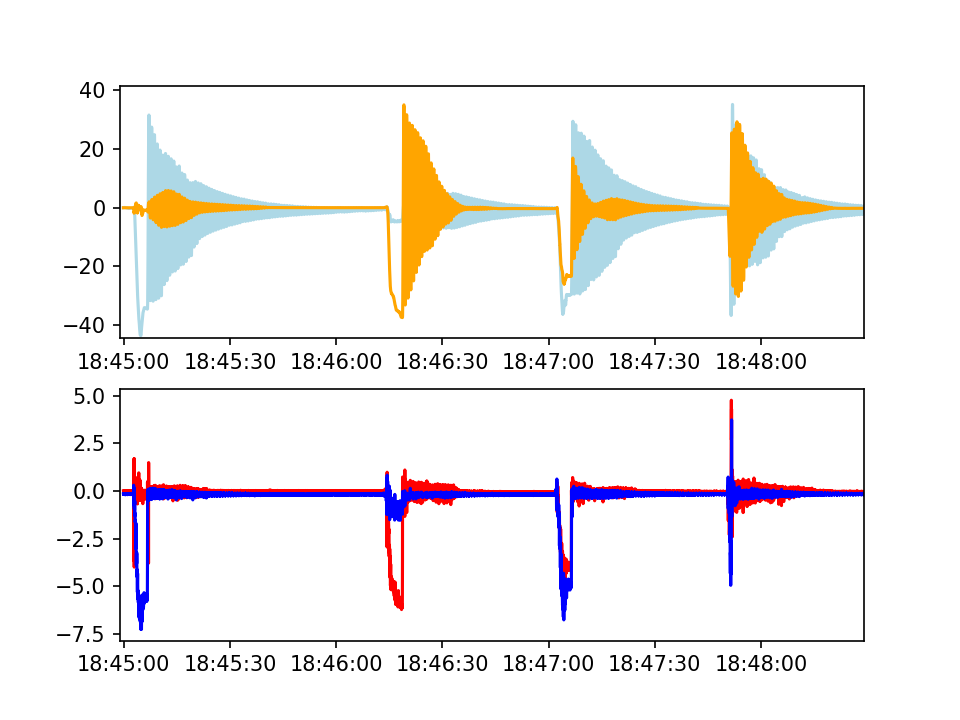

In [65]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook

base = plt.subplot(211)
plt.plot(ptest.pitch, color = 'lightblue')
plt.plot(ptest.roll, color = 'orange')
#plt.plot(ptest.ax, color = 'darkred')
#plt.plot(ptest.ax_calc, color = 'red')
#plt.plot(ptest.ay, color = 'darkblue')
#plt.plot(ptest.ay_calc, color = 'blue')

err = plt.subplot(212, sharex = base)
plt.plot(ax_err,color ='red')
plt.plot(ay_err,color ='blue')

#err = plt.subplot(313, sharex = base)
#plt.plot(pitch,color ='red')
#plt.plot(roll,color ='blue')


In [ ]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook


plt.plot(pZ.pitch)
plt.plot(pZ.roll)
plt.plot(pZ.ax, color = 'black')


In [ ]:
import numpy as np
import scipy as sp
g=9.81
L = g * (7/(9*2*np.pi))**2
L

In [ ]:
plt.plot(pZ.roll)
plt.plot(-pY.roll)

In [ ]:
plt.plot(pZ.heading)
plt.plot(pY.heading+180)

In [ ]:
import hacktrack.clickables
hacktrack.clickables.plotinteractivegpstrack(fd)